# Simulation

Aim
* Examine how often two random lists of number will appear have a statistically significant relationship in a linear regression

In [1]:
# packages to be used
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#enable graphics
%matplotlib inline

In [4]:
df = pd.DataFrame()
df

""


In [5]:
# create dataframe with two series with 1000 random numbers between 1 and 100
df=pd.DataFrame()

df['x'] = np.random.randint(1,100,size=1000)
df['y'] = np.random.randint(1,100,size=1000)

In [6]:
df.head()

,x,y
0,32,85
1,28,78
2,47,79
3,42,23
4,29,56


In [7]:
# run a regression and see if the coefficient is statistically significant

model='y~x'   
results = smf.ols(formula=model, data=df).fit()
results.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.741
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.187
Time:                        13:23:01   Log-Likelihood:                -4804.5
No. Observations:                1000   AIC:                             9613.
Df Residuals:                     998   BIC:                             9623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6789      1.872     25.468      0.000      44.005      51.353
x              0.0430      0.033      1.319      0.187      -0.021       0.107
==============================================================================
Omnibus:                     2314.951   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.995
Skew:                           0.028   Prob(JB):                     3.83e-16
Kurtosis:                       1.696   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# now: do the same 1000 times and record whether the p-value every time

df = pd.DataFrame()
pvalue = list()

for x in range(1000):
    df['x'] = np.random.randint(1,100,size=1000)
    df['y'] = np.random.randint(1,100,size=1000)
        
    model='y~x'
    
    results = smf.ols(formula=model, data=df).fit()
    # instead of recording all results, we only want the pvalue for the coefficient
    # so we use: results.pvalues[1] instead of results.summary()
    # each time this value is appended to the list (called pvalue)
    pvalue.append(results.pvalues[1])

In [19]:
# look at the results
pvalue

[0.4176290250124086,
 0.3972811789172678,
 0.7572709729534465,
 0.250230360245628,
 0.2638626862808842,
 0.571161509023767,
 0.8440576576691023,
 0.5799355262073782,
 0.9940140205655066,
 0.8758753657323188,
 0.05618834451825936,
 0.13338570659652868,
 0.9855012796227054,
 0.08433856165528963,
 0.527865772129734,
 0.3544233883080753,
 0.24455452803420108,
 0.9076727956540275,
 0.6765041887828704,
 0.5907001855164444,
 0.008722802078196416,
 0.6481692455885928,
 0.9860893049132458,
 0.8301908262907418,
 0.14598240664230377,
 0.06788100149208516,
 0.23510025814398242,
 0.9540483828978832,
 0.1692922356067548,
 0.3519092719829573,
 0.19229435183435029,
 0.653513578824666,
 0.6482681176678764,
 0.12770555007255935,
 0.15154777703847852,
 0.35625149559942404,
 0.07774653483866277,
 0.29041154615936127,
 0.5075489426846534,
 0.24936449694099636,
 0.37376012483312726,
 0.30193737072445465,
 0.8262495540461507,
 0.09505768490710491,
 0.5015530761510754,
 0.832239366726549,
 0.591683654689705,


In [25]:
# how many time did we get a statistically significant p-value? (Here defined as a p-value below 0.05)

# put the list in a pandas series (makes life easier!)
df = pd.Series(pvalue)
df.head()

0    0.417629
1    0.397281
2    0.757271
3    0.250230
4    0.263863
dtype: float64

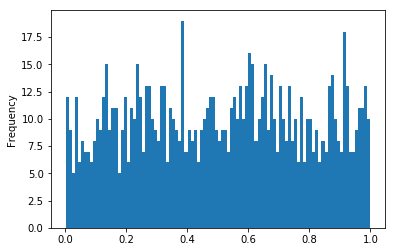

In [26]:
# historgram of p-values
# (sometimes we will get small p-values at random i.e. it appears that the two series are significanly correlated, but we know this is just random connections since the data was generated randomly)
df.plot.hist(bins=100);

In [28]:
# use the series to answer the question og how often we find a p-value below 0.05 when we have random numbers)
len(df[df<0.05])

42

# more advanced exercise
- Remember: We did 1000 regressions and used two series of length 100 with numbers between 1 and 100
- Do you think the result depends on 
    - the number of repeats 
    - the range of possible numbers?
    - the length of the list of numbers in each regression

# to answer that:
- create a function so we can easily change these values and then see what happens

In [30]:
def run_regression(repeats = 1000, min_number=1, max_number=100, list_length=100):
    """
    Runs many regressions between two random list of numbers
    """
    df = pd.DataFrame()
    pvalue = list()

    for x in range(repeats):
        df['x'] = np.random.randint(min_number,max_number,size=list_length)
        df['y'] = np.random.randint(min_number,max_number,size=list_length)

        model='y~x'

        results = smf.ols(formula=model, data=df).fit()
        # instead of recording all results, we only want the pvalue for the coefficient
        # so we use: results.pvalues[1] instead of results.summary()
        # each time this value is appended to the list (called pvalue)
        pvalue.append(results.pvalues[1])
    df = pd.Series(pvalue)
    return df

In [26]:
# as before
pvalues = run_regression(repeats = 1000, min_number=1, max_number=100, list_length=1000)

In [36]:
# but now we can change the values, for instance:
pvalues = run_regression(repeats = 1000, min_number=-10, max_number=10, list_length=1000)


In [38]:
len(pvalues[pvalues<0.025])

18

OK, but this was only one run with some different values, what if we want to try a range of different values and see if we find a pattern

In [39]:
#solution 1: a loop
# for instance: examine changes in max_number, from 2 to 100

significant_list=list()

for max_num in range(2,100):
    pvalues = run_regression(repeats = 100, min_number=1, max_number=max_num, list_length=100)
    significant = len(pvalues[pvalues<0.05])
    significant_list.append(significant)    

df=pd.Series(significant_list, index=range(2,100))
df.head()

2    100
3      3
4      7
5      4
6      7
dtype: int64

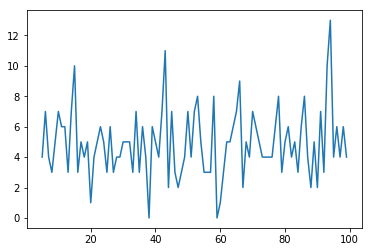

In [40]:
# no (clear) pattern between selecting a small or a large range of numbers
df[3:100].plot.line();

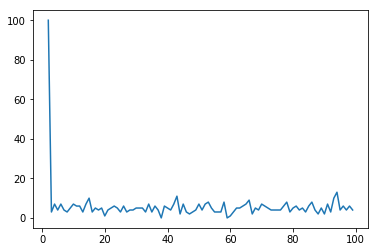

In [42]:
df.plot.line()